参考： https://mp.weixin.qq.com/s/E9lMqNM8uNc57KNvnsBZGQ

代码主体

In [15]:
import numpy as np

def linear_loss(X, y, w, b):
    num_train = X.shape[0]
    num_feature = X.shape[1]    
    # 模型公式
    y_hat = np.dot(X, w) + b    
    # 损失函数
    loss = np.sum((y_hat-y)**2)/num_train    
    # 参数的偏导
    dw = np.dot(X.T, (y_hat-y)) /num_train
    db = np.sum((y_hat-y)) /num_train    
    return y_hat, loss, dw, db


In [16]:
#参数初始化：

def initialize_params(dims):
    w = np.zeros((dims, 1))
    b = 0
    return w, b

In [20]:

#   基于梯度下降的模型训练过程：
def linar_train(X, y, learning_rate, epochs):
    w, b = initialize_params(X.shape[1])  
    loss_list = []  
    for i in range(1, epochs):        
    # 计算当前预测值、损失和参数偏导
        y_hat, loss, dw, db = linear_loss(X, y, w, b)  
        loss_list.append(loss)      
        # 基于梯度下降的参数更新过程
        w += -learning_rate * dw
        b += -learning_rate * db        
        # 打印迭代次数和损失

        if i % 10000 == 0:
            print('epoch %d loss %f' % (i, loss)) 
               
        # 保存参数
        params = {            
            'w': w,            
            'b': b
        }        
        
        # 保存梯度
        grads = {            
            'dw': dw,            
            'db': db
        }    
            
    return loss_list, loss, params, grads

In [21]:
#数据准备：

from sklearn.datasets import load_diabetes
from sklearn.utils import shuffle

diabetes = load_diabetes()
data = diabetes.data
target = diabetes.target 

# 打乱数据
X, y = shuffle(data, target, random_state=13)
X = X.astype(np.float32)

# 训练集与测试集的简单划分
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]
y_train = y_train.reshape((-1,1))
y_test = y_test.reshape((-1,1))

print('X_train=', X_train.shape)
print('X_test=', X_test.shape)
print('y_train=', y_train.shape)
print('y_test=', y_test.shape)

X_train= (397, 10)
X_test= (45, 10)
y_train= (397, 1)
y_test= (45, 1)


In [22]:
#执行训练：

loss_list, loss, params, grads = linar_train(X_train, y_train, 0.001, 100000)



epoch 10000 loss 5533.039734
epoch 20000 loss 5217.582409
epoch 30000 loss 4949.676466
epoch 40000 loss 4721.504031
epoch 50000 loss 4526.567333
epoch 60000 loss 4359.463960
epoch 70000 loss 4215.700505
epoch 80000 loss 4091.538010
epoch 90000 loss 3983.863771


In [23]:
def predict(X, params):
    w = params['w']
    b = params['b']

    y_pred = np.dot(X, w) + b    
    return y_pred

y_pred = predict(X_test, params)
y_pred[:5]

array([[132.02545017],
       [141.77423134],
       [150.48352021],
       [128.48666753],
       [147.29312454]])

In [26]:
X_test

array([[ 0.00175052, -0.04464164, -0.06548562, -0.00567061, -0.00707277,
        -0.01947649,  0.04127682, -0.03949338, -0.00330371,  0.00720652],
       [-0.06363517, -0.04464164,  0.03582872, -0.02288496, -0.03046397,
        -0.01885019, -0.00658447, -0.00259226, -0.02595242, -0.05492509],
       [-0.00914709,  0.05068012, -0.03961813, -0.04009932, -0.00844872,
         0.01622244, -0.06549067,  0.07120998,  0.01776348, -0.06735141],
       [ 0.00175052, -0.04464164, -0.07087468, -0.02288496, -0.00156896,
        -0.00100073,  0.02655027, -0.03949338, -0.02251217,  0.00720652],
       [-0.10722563, -0.04464164, -0.01159501, -0.04009932,  0.04934129,
         0.0644473 , -0.01394774,  0.03430886,  0.00702686, -0.03007245],
       [ 0.01628068,  0.05068012,  0.00241654, -0.00567061, -0.00569682,
         0.01089891, -0.05076412,  0.03430886,  0.02269202, -0.03835666],
       [-0.02367725, -0.04464164, -0.01590626, -0.01255635,  0.02044629,
         0.04127431, -0.04340085,  0.03430886

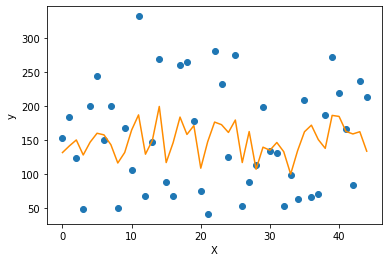

In [25]:
import matplotlib.pyplot as plt
f = X_test.dot(params['w']) + params['b']

plt.scatter(range(X_test.shape[0]), y_test)
plt.plot(f, color = 'darkorange')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

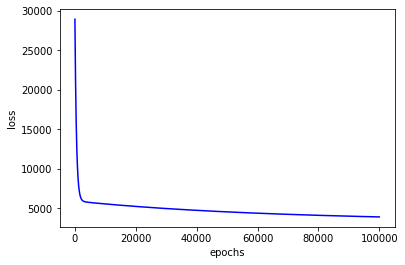

In [27]:
# 训练过程的损失

plt.plot(loss_list, color = 'blue')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()